### 분석 과제 - AI/인공지능 분야 출원 특허 데이터 분석



- 기대 인사이트

    1. 수년간 기술 동향 
    
      * 시기의 국내 AI 기술 발전 추이 분석
      * 연도 별 특허 건수를 통해 특정 시점의 기술

    2.응용 분야별 및 기술 유형별 특허 분포 분석

      * 분야별 카테고리 분류 - category 파생변수 생성

    3.주요 출원인 및 기관 분석
      
      * 출원인 그룹별 카테고리 분류 - 대그룹, 소그룹으로 파생변수 생성

    4.우선권 주장번호 및 국제 출원 여부 분석

      * 국내 출원 특허의 국제적 확장 가능성과 
      * 중복 특허 여부를 평가

    5. 외국인 출원인과 국내기업/개인의 출원 건수 비교



In [4]:
import pandas as pd

df = pd.read_excel('result_mod_28June2024.xlsx',index_col=0)
df.head()

,status,title,ap_num,application_date,applicant,representative,final_owner,priority_date,international_filing_date,summary,...,금융,교육,농업,엔터테인먼트,보안,자동화시스템,applicant_sgrp,applicant_lgrp,ongoing,application_year
0,등록,자동화 폐기물 수거함의 딥러닝 기반 인공지능 운영 시스템 및 방법(OPERATION...,1020200078616,2020-06-26,(주)에이씨아이케미칼아시아,고영갑,(주)에이씨아이케미칼아시아,NaN,NaN,"본 발명의 실시 예에 따른 시스템은, 자동화 폐기물 수거함의 딥러닝 기반 인공지능 ...",...,0,0,0,0,0,1,etc,etc,1,2020
1,등록,"인공지능(AI)을 통한 딥러닝훈련모듈과, 순위화프레임워크모듈을 활용하여, 법률전문가...",1020170099431,2017-08-07,강준철,이영규,강소라,NaN,NaN,"본 발명은, 인공지능(AI)에 관한 기술과 온라인 문자열 사전에 관한 기술을 활용하...",...,0,0,0,0,0,0,etc,etc,1,2017
2,공개,인공지능을 이용한 품질검사 시스템 및 방법(System and method for ...,1020220014151,2022-02-03,모던에이아이비전솔루션 주식회사,김정수,NaN,NaN,NaN,"본 발명은 품질검사를 위한 장치 및 방법에 관한 것으로, 본 발명에 따르면, 종래,...",...,0,0,0,0,0,0,etc,etc,1,2022
3,공개,파이썬 딥러닝 기반 인공지능(AI) 부동산 컨설팅 매물장(Python deep le...,1020210106993,2021-08-12,조국환,NaN,NaN,NaN,NaN,본 발명은 광범위하게 활용되는 인터넷기반 부동산 정보를 때와 장소를 불문하고 기록하...,...,0,0,0,0,0,0,etc,etc,1,2021
4,거절,PI 기반 빅데이터 퍼스널 컬러 진단 인공지능 딥러닝 알고리즘 시스템 운영방법(PI...,1020230034713,2023-03-16,주식회사 오콜로르,박상열,NaN,NaN,NaN,본 발명은 PI(Personal Identity) 정보 빅데이터를 구축하는 통하여 ...,...,0,0,0,0,0,0,etc,etc,0,2023


In [5]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10696\816010303.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='application_year',color='orange',order=category_order,palette= sns.color_palette("Set3"))


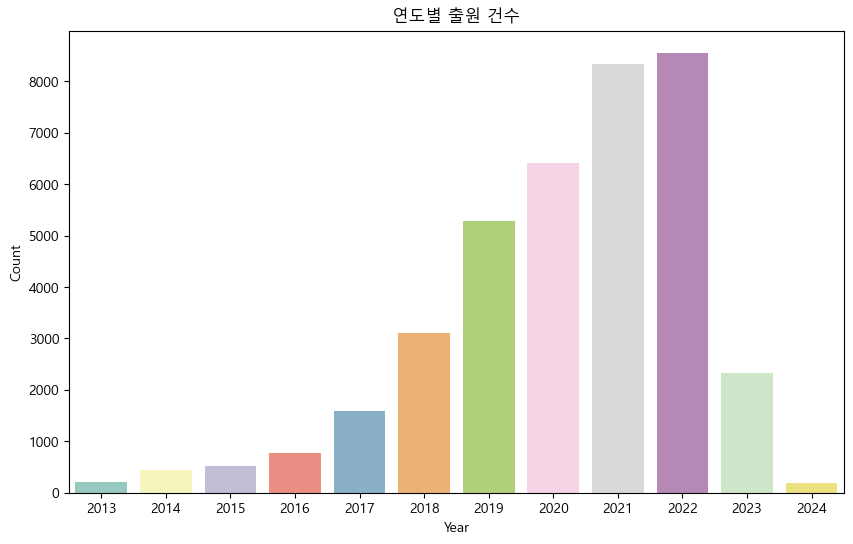

In [63]:
# insight 1 : 연도별 특허 출원 건수
import matplotlib.pyplot as plt
import seaborn as sns

category_order = sorted(df['application_year'].unique())
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='application_year',color='orange',order=category_order,palette= sns.color_palette("Set3"))


plt.xlabel('Year')
plt.ylabel('Count')
plt.title('연도별 출원 건수')
plt.show()

In [64]:
df.columns

Index(['status', 'title', 'ap_num', 'application_date', 'applicant',
       'representative', 'final_owner', 'priority_date',
       'international_filing_date', 'summary', '제너럴', '의료', '전자상거래서비스', '자동차',
       '금융', '교육', '농업', '엔터테인먼트', '보안', '자동화시스템', 'applicant_sgrp',
       'applicant_lgrp', 'ongoing', 'application_year'],
      dtype='object')

In [71]:
df_category

Index(['자동화시스템', '보안', '엔터테인먼트', '농업', '교육', '금융', '자동차', '전자상거래서비스', '의료',
       '제너럴'],
      dtype='object')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10696\1658972226.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[category] != 0] , x='application_year',ax = axes[row,col],palette=sns.color_palette("Set3"),order=category_order)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10696\1658972226.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row,col].set_xticklabels(axes[row,col].get_xticklabels(),rotation=45)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10696\1658972226.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[category] != 0] , x='application_

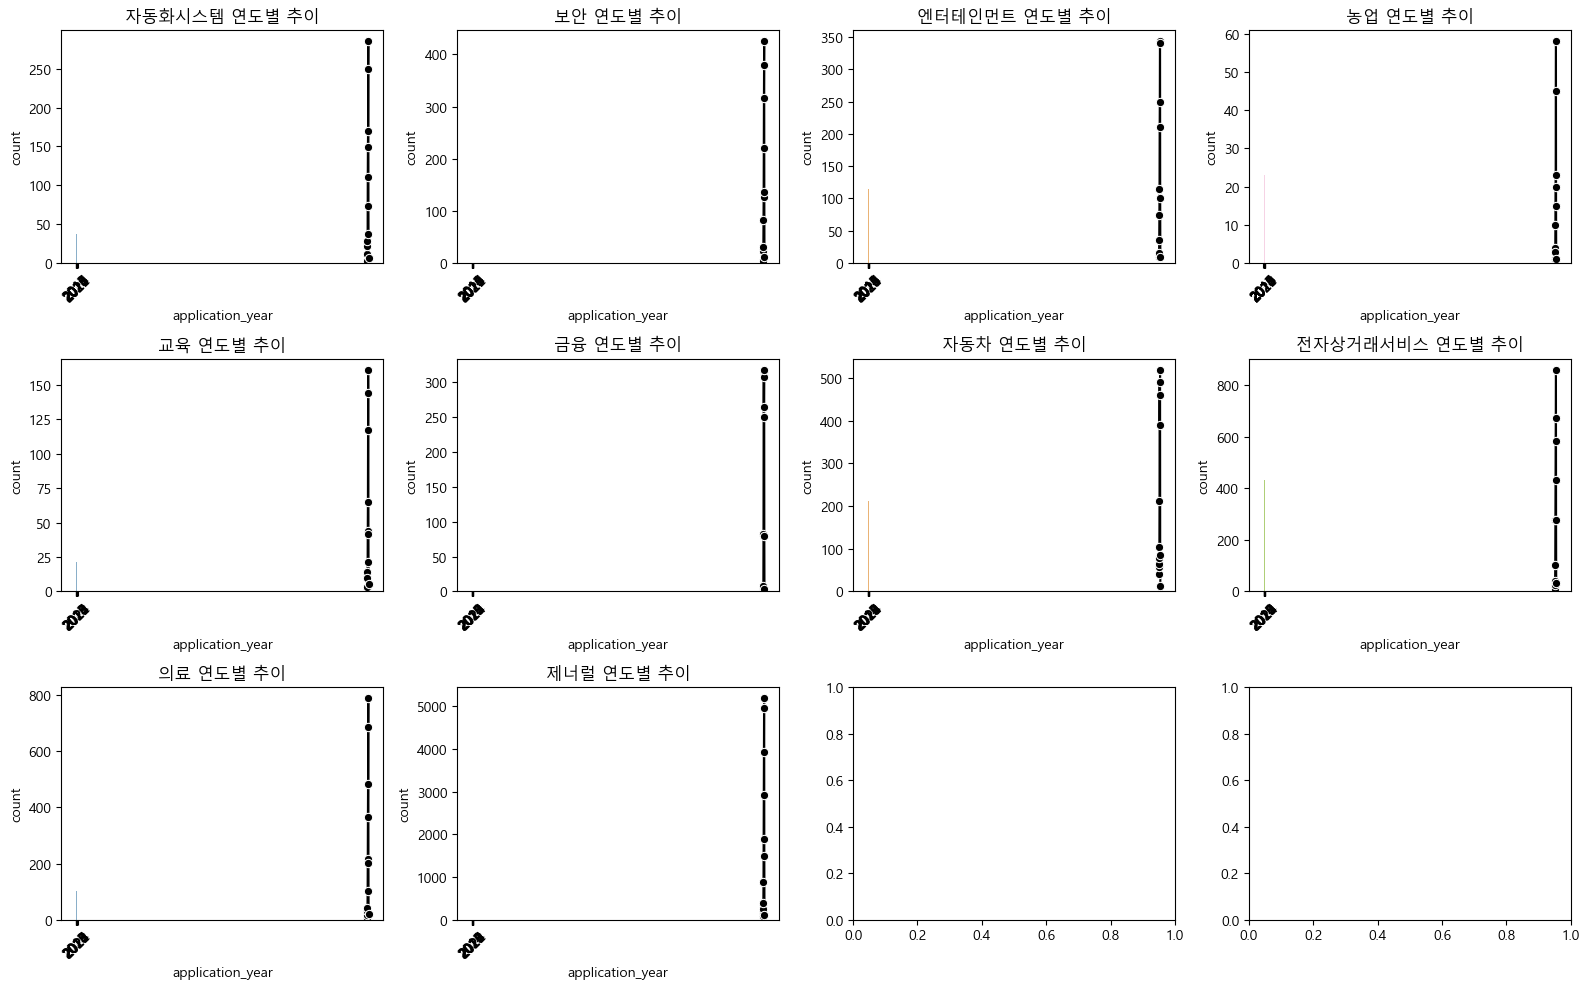

In [70]:
# insight 1: 각 기술 카테고리별 해마다 출원 건수 변화 추이

import matplotlib.pyplot as plt
import seaborn as sns

category_order = sorted(df['application_year'].unique())
df_category = df.columns[-5:-15:-1]
fig, axes = plt.subplots(3,4,figsize=(16,10))
for i, category in enumerate(df_category):
    row = i // 4
    col = i % 4
    sns.countplot(data=df[df[category] != 0] , x='application_year',ax = axes[row,col],palette=sns.color_palette("Set3"),order=category_order)
    axes[row,col].set_title(f"{category} 연도별 추이")
    axes[row,col].set_xticklabels(axes[row,col].get_xticklabels(),rotation=45)
    count_data = df[df[category] != 0].groupby('application_year').size().reset_index(name='count')
    sns.lineplot(data=count_data, x='application_year',y ='count', ax=axes[row, col], color='black',marker='o')
plt.tight_layout()
plt.show()


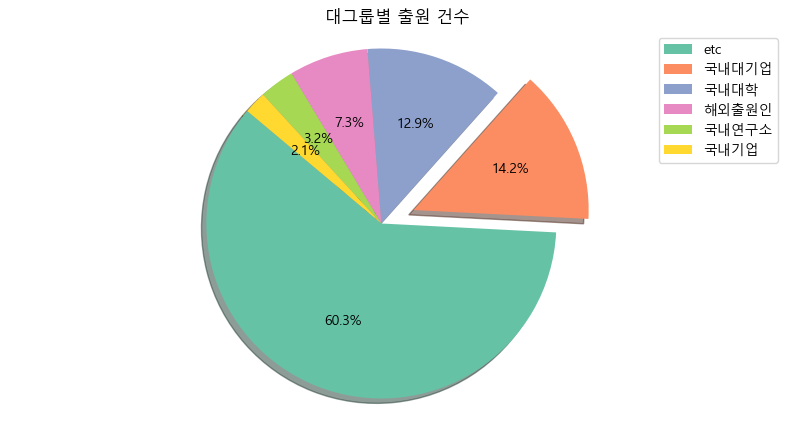

In [7]:
# insight 3. 출원인 그룹별 pie-chart
# 대그룹별 출원건수
import matplotlib.pyplot as plt
import seaborn as sns
explode= [0,0.2,0,0,0,0]
plt.figure(figsize=(10, 5))
lgrp_value = df['applicant_lgrp'].value_counts()
plt.pie(lgrp_value,autopct='%1.1f%%',colors = sns.color_palette('Set2'),shadow=True,startangle=140,explode=explode)
plt.xticks(rotation=45)
plt.legend(labels = lgrp_value.index ,loc='upper right', fontsize='medium')
plt.title('대그룹별 출원 건수')
plt.axis('equal')
plt.show()

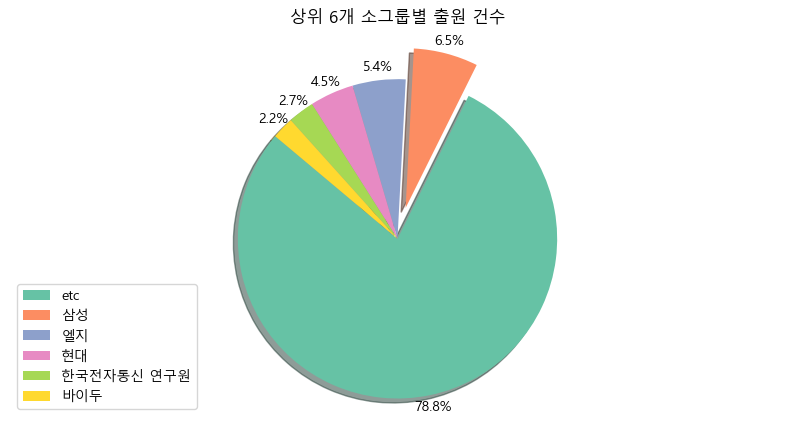

In [128]:
# 소그룹별 출원 건수
import matplotlib.pyplot as plt
explode=[0,0.2,0,0,0,0]
plt.figure(figsize=(10, 5))

df_max_sgrp = df['applicant_sgrp'].value_counts().sort_values(ascending=False).head(6)
plt.pie(df_max_sgrp,autopct='%1.1f%%',pctdistance=1.08, colors=sns.color_palette('Set2'),shadow=True,explode=explode,startangle=140)
plt.xticks(rotation=45)
plt.title('상위 6개 소그룹별 출원 건수')
plt.legend(labels = df_max_sgrp.index,loc='lower left', fontsize='medium')
plt.xticks(ratation=45)
plt.axis('equal')
plt.show()

In [8]:
df_category = df.columns[-5:-15:-1]

In [153]:
df.groupby('applicant_lgrp')[df_category].size()

applicant_lgrp
etc      22776
국내기업       783
국내대기업     5368
국내대학      4860
국내연구소     1219
해외출원인     2765
dtype: int64

In [20]:
h

,applicant_lgrp,자동화시스템,보안,엔터테인먼트,농업,교육,금융,자동차,전자상거래서비스,의료,제너럴
0,etc,786,1114,1134,147,524,1172,1130,2783,2069,14734
1,국내기업,6,61,24,0,6,86,11,73,47,432
2,국내대기업,102,129,135,3,20,67,838,228,137,2203
3,국내대학,114,298,123,16,62,85,218,139,556,3041
4,국내연구소,72,88,19,13,9,14,81,32,81,680
5,해외출원인,64,68,80,1,8,204,234,51,70,1263


In [18]:
h = df.groupby('applicant_lgrp')[df_category].sum().reset_index()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6060\3859068620.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = h, x='applicant_lgrp',ax = axs[row,col],palette=sns.color_palette("Set3"))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6060\3859068620.py:8: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.countplot(data = h, x='applicant_lgrp',ax = axs[row,col],palette=sns.color_palette("Set3"))


NameError: name 'axes' is not defined

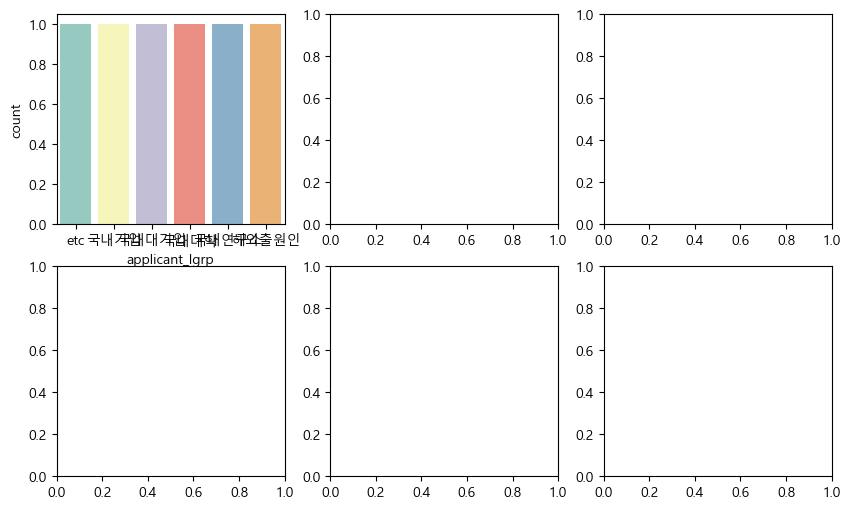

In [25]:
# x = h['applicant_lgrp']

fig, axs = plt.subplots(2,3,figsize=(10,6))
# 각 카테고리에 대해 막대 그래프 그리기
for i, col in enumerate(h.columns[1:]):  # applicant_lgrp는 제외하고 그린다
    row = i // 3
    col = i % 3
    sns.countplot(data = h, x='applicant_lgrp',ax = axs[row,col],palette=sns.color_palette("Set3"))
    axes[row,col].set_title(f"{col}")
    # axes[row,col].set_xticklabels(axes[row,col].get_xticklabels(),rotation=45)

plt.tight_layout()

# 그래프 표시
plt.show()

<Axes: xlabel='applicant_lgrp', ylabel='count'>

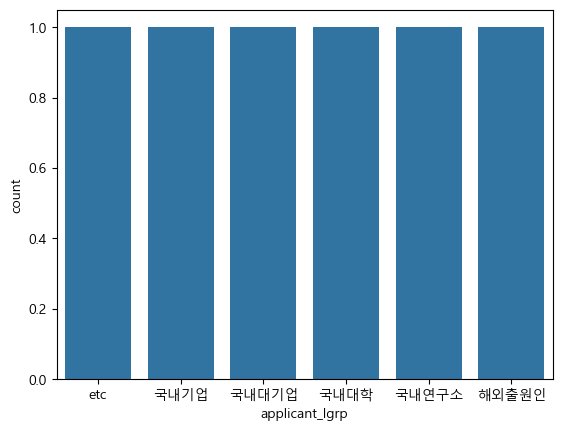

In [17]:
sns.countplot(data = h , x='applicant_lgrp')

In [10]:
a = df.groupby('applicant_lgrp')[df_category].sum().unstack()

In [11]:
import pandas as pd
new = pd.DataFrame(a).T
new

자동화시스템                                보안                  ...  \
applicant_lgrp    etc 국내기업 국내대기업 국내대학 국내연구소 해외출원인   etc 국내기업 국내대기업 국내대학  ...   
0                 786    6   102  114    72    64  1114   61   129  298  ...   

                  의료                     제너럴                               
applicant_lgrp 국내대기업 국내대학 국내연구소 해외출원인    etc 국내기업 국내대기업  국내대학 국내연구소 해외출원인  
0                137  556    81    70  14734  432  2203  3041   680  1263  

[1 rows x 60 columns]

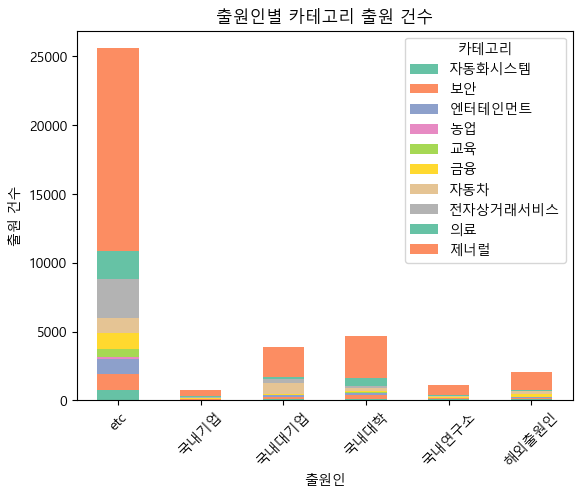

In [142]:
df_grouped.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'))

# 그래프 제목과 축 레이블 설정
plt.title('출원인별 카테고리 출원 건수')
plt.xlabel('출원인')
plt.ylabel('출원 건수')
plt.xticks(rotation=45)
plt.legend(title='카테고리')
plt.show()

In [ ]:
# 출원인별 카테고리


df_category

for i, category in enumerate(df_category):

    sns.countplot(data = df, x = 'applicant_lgrp',y='category')
plt.show()

In [129]:
df_category

Index(['자동화시스템', '보안', '엔터테인먼트', '농업', '교육', '금융', '자동차', '전자상거래서비스', '의료',
       '제너럴'],
      dtype='object')

In [83]:
# isight 4. 해외 출원 기관의 개수
print(len(df[df.international_filing_date.notna()]))

3688


In [84]:
print(len(df[df.international_filing_date != 0]))

37771


In [85]:
df.international_filing_date = df.international_filing_date.fillna(0)

In [86]:
df['international_application'] = df['international_filing_date'].apply(lambda x: '국내출원' if x == 0 else '국내+해외출원')

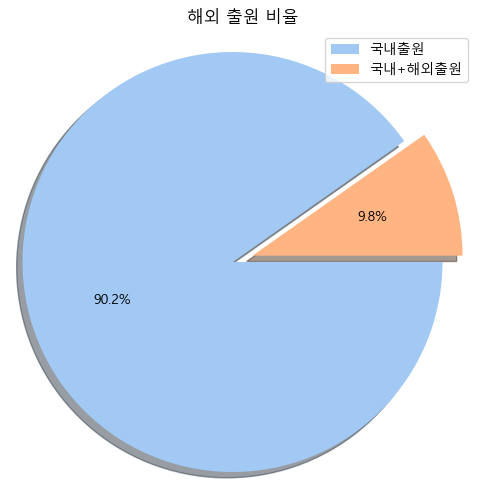

In [87]:
# 국내 출원 건수에서 차지 하는 비율
import matplotlib.pyplot as plt
import seaborn as sns
explode=[0,0.1]
plt.figure(figsize=(6,6))
plt.pie(df.international_application.value_counts(),autopct='%.1f%%', startangle=0, explode=explode, shadow=True, counterclock=False, colors=sns.color_palette('pastel'))
plt.title("해외 출원 비율")
plt.legend(df.international_application.value_counts().index)
plt.axis('equal')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10696\449831822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = applicant_year, x='application_year',order=category_order,palette= sns.color_palette("Set3"))


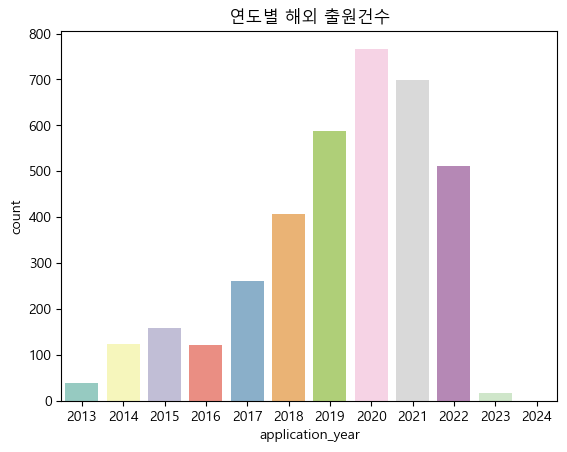

In [91]:
# 출원 건수의 년도 별 변화

category_order = sorted(df['application_year'].unique())

applicant_year = df[df.international_filing_date != 0]
sns.countplot(data = applicant_year, x='application_year',order=category_order,palette= sns.color_palette("Set3"))
plt.title('연도별 해외 출원건수')
plt.show()

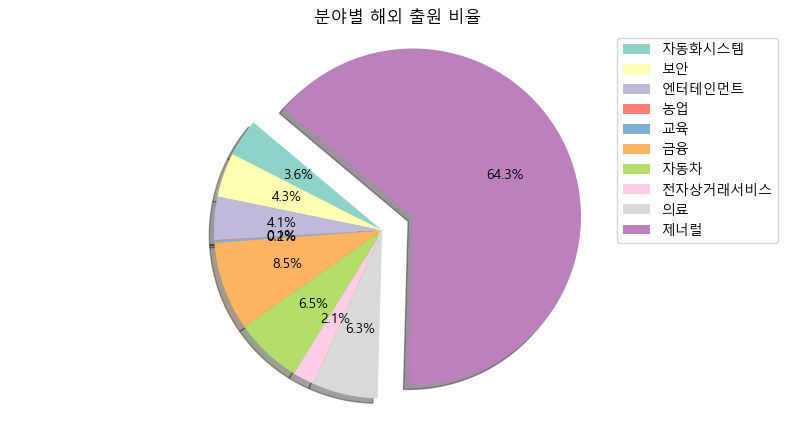

In [127]:
# 카테고리별 해외 출원
explode = [0,0,0,0,0,0,0,0,0,0.2]
counts = applicant_year[df_category].sum()
plt.figure(figsize=(10,5))
plt.pie(counts,autopct='%1.1f%%',colors=sns.color_palette('Set3'),explode=explode,shadow=True,startangle=140)
plt.legend(applicant_year[df_category].columns)
plt.title('분야별 해외 출원 비율')
plt.axis('equal')
plt.show()


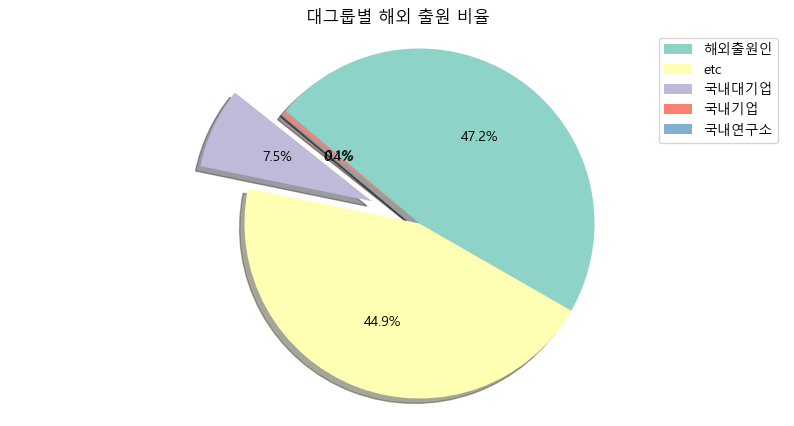

In [95]:
# 그룹별 해외 출원
explode=[0,0,0.3,0,0]
plt.figure(figsize=(10,5))
plt.pie(applicant_year.applicant_lgrp.value_counts(),autopct='%1.1f%%', colors=sns.color_palette('Set3'),startangle=140,explode=explode,counterclock=False,shadow=True)
plt.legend(applicant_year.applicant_lgrp.value_counts().index)
plt.title('대그룹별 해외 출원 비율')
plt.axis('equal')
plt.show()

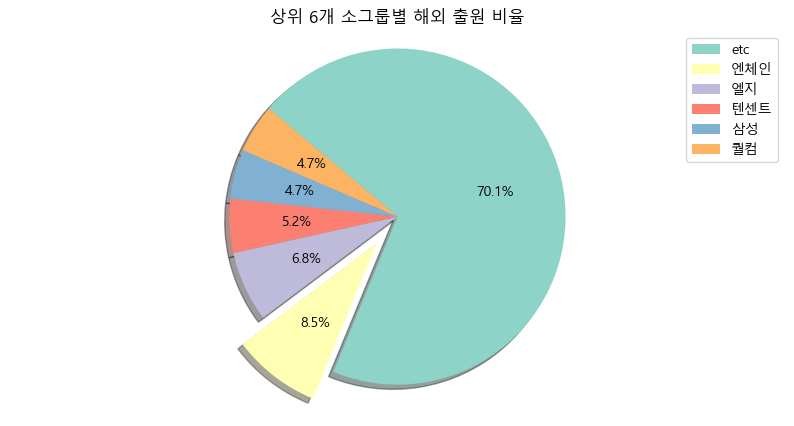

In [124]:
plt.figure(figsize=(10,5))
explode=[0,0.2,0,0,0,0]
df_max_sgrp1 = applicant_year.applicant_sgrp.value_counts().sort_values(ascending=False).head(6)
plt.pie(df_max_sgrp1,autopct='%1.1f%%', colors=sns.color_palette('Set3'),startangle=140,counterclock=False,shadow=True,explode=explode)
plt.legend(applicant_year.applicant_sgrp.value_counts().index)
plt.title('상위 6개 소그룹별 해외 출원 비율')
plt.axis('equal')
plt.show()

In [25]:
#  국내 특허 (국내 출원인 특허로 한정) 들이 해외 출원 하는지 여부

# 중복 특허 확인
duplicate_patents = df[df['priority_date'].notnull()]
num_duplicate_patents = len(duplicate_patents)

# 국제 출원 특허 확인
international_patents = df[df['international_filing_date'].notnull()]
num_international_patents = len(international_patents)

# 결과 출력
print(f"중복 특허 개수: {num_duplicate_patents}")
print(f"국제 출원 특허 개수: {num_international_patents}")

중복 특허 개수: 147903
국제 출원 특허 개수: 364212


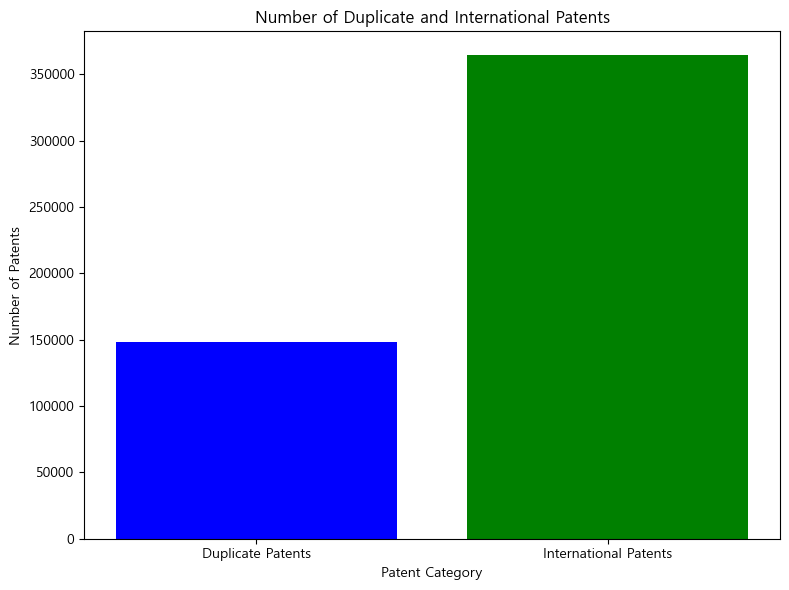

In [26]:
# 중복 특허 및 국제 출원 특허 건수 파악
# 특허 개수 시각화
categories = ['Duplicate Patents', 'International Patents']
counts = [num_duplicate_patents, num_international_patents]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Patent Category')
plt.ylabel('Number of Patents')
plt.title('Number of Duplicate and International Patents')
plt.tight_layout()
plt.show()

ongoing
1    310515
0     53697
Name: count, dtype: int64


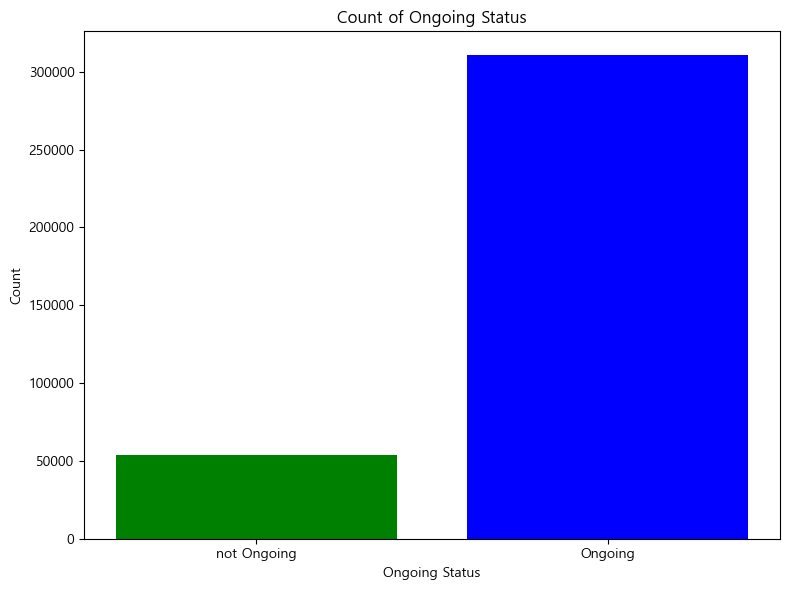

In [27]:
# 특허 출원 개수 대비 거절 건수 비교

# onGoing 컬럼 카운트
ongoing_counts = df['ongoing'].value_counts()

# 결과 출력
print(ongoing_counts)

# onGoing 컬럼 시각화
categories = ongoing_counts.index
counts = ongoing_counts.values

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Ongoing Status')
plt.ylabel('Count')
plt.title('Count of Ongoing Status')
plt.xticks(categories, ['Ongoing', 'not Ongoing'])
plt.tight_layout()
plt.show()

Applicant Type
Domestic    355742
Foreign       8470
Name: count, dtype: int64


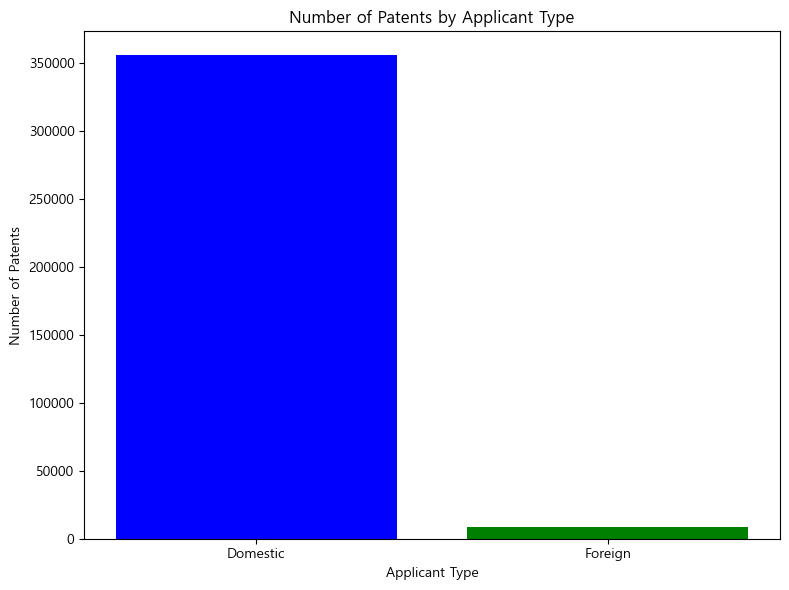

In [28]:
# 국내/외국인 출원 건수 비교
# 외국인 분류 키워드
foreign_keywords = [
    '애플', '도요타', '타이완세미컨덕터', '화웨이', '인텔', 'TSMC'
]

# 출원인을 분류할 함수
def classify_applicant(applicant):
    if any(keyword.lower() in applicant.lower() for keyword in foreign_keywords):
        return 'Foreign'
    else:
        return 'Domestic'

# 각 출원인을 분류하여 새로운 열에 저장
df['Applicant Type'] = df['applicant'].apply(classify_applicant)

# 각 분류별 개수 계산
applicant_type_counts = df['Applicant Type'].value_counts()

# 결과 출력
print(applicant_type_counts)

# 분류별 개수를 막대 그래프로 시각화
categories = applicant_type_counts.index
counts = applicant_type_counts.values

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Applicant Type')
plt.ylabel('Number of Patents')
plt.title('Number of Patents by Applicant Type')
plt.tight_layout()
plt.show()

In [ ]:
# f. 출원 특허 중에 출원인에서 새로운 양도인으로 양도된 경우 건수 변화

# mismatch 여부를 확인할 함수
def check_mismatch(row):
    if pd.isna(row['final_owner']):
        return 'not mismatch'
    elif row['applicant'].strip().lower() == row['final_owner'].strip().lower():
        return 'not mismatch'
    else:
        return 'mismatch'

# mismatch 여부를 확인하여 새로운 열에 저장
df['mismatch'] = df.apply(check_mismatch, axis=1)

# 각 분류별 개수 계산
mismatch_counts = df['mismatch'].value_counts()

# 결과 출력
print(mismatch_counts)

# 분류별 개수를 막대 그래프로 시각화
categories = mismatch_counts.index
counts = mismatch_counts.values

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Mismatch Status')
plt.ylabel('Number of Patents')
plt.title('Number of Mismatches between Applicant and Final Owner')
plt.tight_layout()
plt.show()